## The Perceptron

In this notebook, we first build a perceptron class by scratch. Then we implement it with the CVDs dataset. At last, we do the performance analysis.

In [21]:
# Build the Perceptron class
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [22]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")
df.head() #shows the first 5 rows of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
# Data Preprocessing by onehot encoding
df.HeartDisease = df.HeartDisease.replace({0:-1})
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,40,1,140,289,0,172,0,0.0,-1,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,-1,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,-1,0,1,0,1,0,0,1


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease',axis=1).to_numpy()
y = df.HeartDisease

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
# Instantiate one instance of the Perceptron class
np.random.seed(2)
percep = Perceptron()

# Call the train method to train the weights and bias of the given instance
percep.train(X_train, y_train)

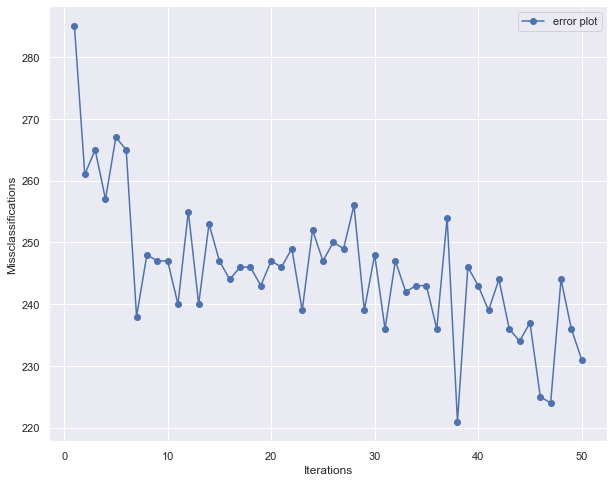

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

cf_matrix = [[ 78  34]
 [ 34 130]] 



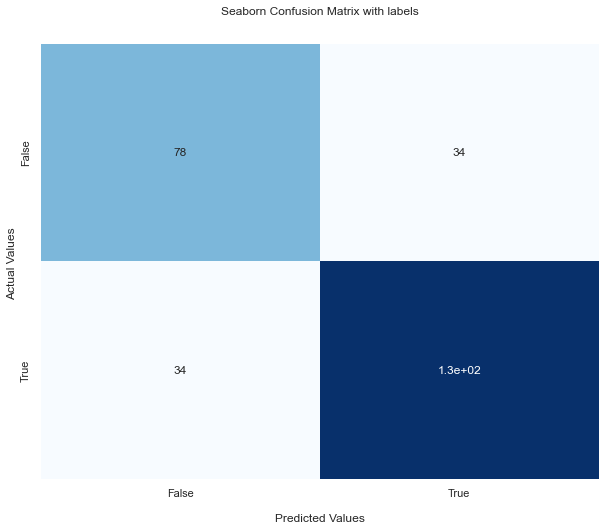

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Make predictions on testing data
y_pred = percep.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [28]:
#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.70      0.70      0.70       112
           1       0.79      0.79      0.79       164

    accuracy                           0.75       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.75      0.75      0.75       276



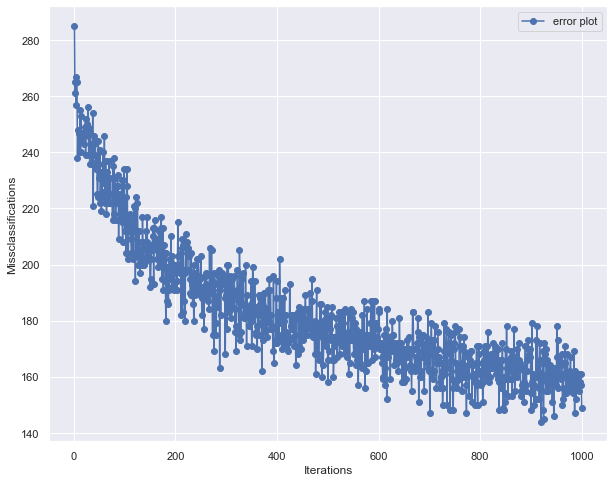

In [29]:
# What if we increase the epochs number to 1000?
np.random.seed(2)
percep = Perceptron(epochs = 1000)
percep.train(X_train, y_train)

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

cf_matrix = [[  1 111]
 [  0 164]] 



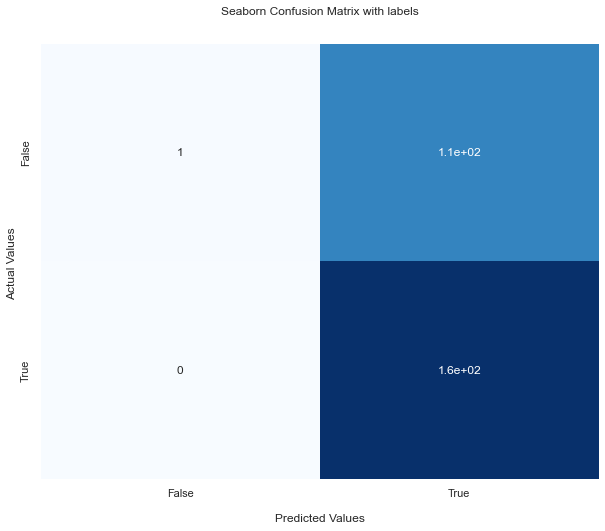

In [30]:
y_pred = percep.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"cf_matrix = {cf_matrix} \n")

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [31]:
#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.02       112
           1       0.60      1.00      0.75       164

    accuracy                           0.60       276
   macro avg       0.80      0.50      0.38       276
weighted avg       0.76      0.60      0.45       276



We can see that, by increasing epochs from 50 to 1000, the error of models decreased. However, from the confusion matrix, we can see that the model performance for large epochs was worse, as it classified almost all the data into having heart disease. The reason for this might be the perceptron method is only accurate when the data is linearly separable.

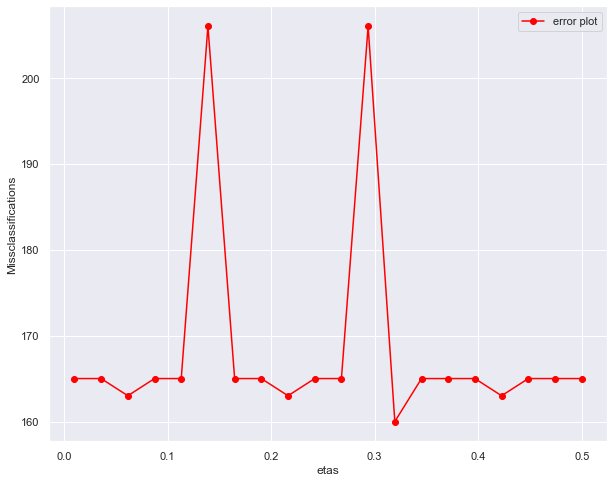

In [33]:
# Different learning rates
etas = np.linspace(0.01,0.5,20)
errors = []
np.random.seed(2)
for eta in etas:
    percep = Perceptron(eta = eta)
    percep.train(X_train, y_train)
    y_pred = percep.predict(X_test)
    error = sum(y_pred == y_test)
    errors.append(error)

plt.figure(figsize = (10, 8))
plt.plot(etas, errors, 
         marker = "o",
         label = "error plot", color = 'red')
plt.xlabel("etas")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()